In [22]:
from google.colab import files
uploaded = files.upload() 

Saving labeled_data.csv to labeled_data (1).csv


In [25]:
import pandas as pd
glove = files.upload()


Saving glove.6B.50d.txt to glove.6B.50d (1).txt


In [0]:
def get_glove():
  with open ('glove.6B.50d.txt') as f:
    for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [0]:

EPOCHS = 10
BATCH_SIZE = 30
HIDEN_STATE = 256
FILTER_SIZE = 150
KERNEL_SIZE = 3
embedding_dim=300

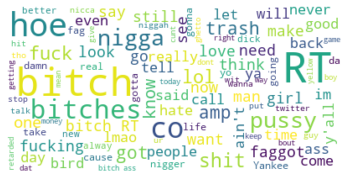

In [28]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def _get_data():
        try:

            # csv_path =  'labeled_data.csv'
            # df = pd.read_csv(io.BytesIO(uploaded['labeled_data.csv']))
            data = pd.read_csv('labeled_data.csv', sep=',', header=None, error_bad_lines=False) # use pandas to read CSV
            data = data.dropna() # drop any rows with nans
            Y = data[5]
           
            # Y = [int(i) for i in Y.values]
            return data[6].values,Y.values
        except ValueError:
            return None, None

text = _get_data()[0][0]
# for t,l in (_get_data()[0], _get_data[1]):
#   # pass
#   print(t, l)
for t in _get_data()[0][1:]:
  text += " "+ str(t)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
import io
import os
import re
import string
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from sklearn.externals import joblib
from sklearn import preprocessing
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import pdb
from wordcloud import WordCloud

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import pipeline, feature_extraction, svm, metrics
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import random
  
lemmatizer = WordNetLemmatizer()

TAG_RE = re.compile(r'<[^>]+>')




def _get_vocabulary(documents):
    return set(" ".join(documents).split())

def _get_tokenizer(documents):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(documents)
    return tokenizer

def _clean_documents(documents):
    # convert to list
    documents = documents.tolist()
    # clean docs
    print("Starting cleaning %s documents" % len(documents))
    documents = [_clean_doc(doc) for doc in documents]
    return documents

def _clean_doc( doc):
    # remove HTML tags
    doc = _clean_tags(doc)
    # replace all newlines and tabs
    doc = doc.replace('\\n', ' ').replace('\\r', ' ').replace('\\t', ' ')
    # add missing space after full stops and commas
    doc = re.sub(r'(?<=[.,])(?=[^\s])', r' ', doc)
    
    # create tokens
    tokens = word_tokenize(doc)
    # downcase
    tokens = [w.lower() for w in tokens]
    
    # regexp
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # for i in range(len(tokens)):
      # if tokens[i][0] in re_punc:
        # del tokens[i] 
    stripped = [re_punc.sub('', w) for w in tokens]
    # remove non-alphabetic tokens
    words = [word for word in stripped if word.isalpha()]
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    # words = [w for w in words if not w in stop_words]
    #because there are many "nt"s and it may be important
    # for i in range(len(words)):
    #   if words[i] == "nt":
    #     words[i] = "not"

    # lemmatizer = WordNetLemmatizer()
    # tokens = [lemmatizer.lemmatize(w) for w in words]
    # reduce word to base
    # porter = PorterStemmer()
    # stemmed = [porter.stem(word) for word in words]
    print('.', end='', flush=True)
    return " ".join(words)

def _clean_tags( text):
    return TAG_RE.sub('', text)

def _get_model( vocabulary_size=1, input_length=1, load_weights=False):
    try:
        model = Sequential()
        model.add(Embedding(vocabulary_size, 16, input_length=input_length))
        model.add(MaxPooling1D(5))
        model.add(LSTM(10))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
        return model
    except ValueError:
        return None




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# doc ="!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."
# print(_clean_doc(doc))
# print(lemmatizer.lemmatize(doc))

In [31]:
try:
  X, Y = _get_data()
  documents = _clean_documents(X)
except:
  nltk.download("stopwords")
  nltk.download('punkt')
  X, Y = _get_data()
  documents = _clean_documents(X)

Starting cleaning 24783 documents
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

vocabulary = _get_vocabulary(documents)
vocab_size = len(vocabulary) + 1

tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
# encoded = tokenizer.texts_to_sequences(documents)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# X = pad_sequences(sequences, maxlen=max_document_length)

tokenizer = _get_tokenizer(documents)
max_document_length = max([len(s.split()) for s in documents])
encoded = tokenizer.texts_to_sequences(documents)
X = sequence.pad_sequences(encoded, maxlen=max_document_length)
# model = _get_model(vocab_size, max_document_length)

Found 30344 unique tokens.


GLOVE

In [33]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100


embeddings_index = {}
f = open('glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_matrix = np.zeros((len(word_index) + 1, 50))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else: embedding_matrix[i] = random.random()

Found 400000 word vectors.


In [45]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import pipeline, feature_extraction, svm, metrics
from keras.layers import Bidirectional

def LSTM_model():
        model = Sequential()
        
        model.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_document_length, trainable=True))
        
        # model.add(Bidirectional(LSTM(HIDEN_STATE, return_sequences = True)))

        # model.add(Dropout(0.5))

        # model.add(Bidirectional(LSTM(HIDEN_STATE, return_sequences = True)))

        model.add(Dropout(0.5))  

        model.add(LSTM(HIDEN_STATE, return_sequences = True))
        model.add(SeqSelfAttention(attention_activation='sigmoid'))
        model.add(GlobalAveragePooling1D())
        model.add(Dense(3, activation="softmax"))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

def classify(X, y):
    # self.split(X,y)
    cv = StratifiedKFold(n_splits=5)
    results = [0,0,0, 0,0,0,0,0,0]
    for train_idx, test_idx, in cv.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        model = LSTM_model()
        model.fit(X_train, y_train, validation_split=0.2, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

        y_pred = model.predict_classes(X_test) 
        y_test = [int(i) for i in y_test]
        print(metrics.classification_report(y_test, y_pred))
        results = [x + y for x, y in zip(results , list( metrics.precision_recall_fscore_support(y_test, y_pred, average="macro")[:-1] + metrics.precision_recall_fscore_support(y_test, y_pred, average="weighted")[:-1]))]
    print([round(x / 5, 2) for x in results ])
classify(X,Y)



Train on 15860 samples, validate on 3966 samples
Epoch 1/10
15860/15860 [==============================] - 80s 5ms/step - loss: 0.4865 - acc: 0.8304 - val_loss: 0.3306 - val_acc: 0.8893
Epoch 2/10
15860/15860 [==============================] - 77s 5ms/step - loss: 0.3540 - acc: 0.8771 - val_loss: 0.2972 - val_acc: 0.9029
Epoch 3/10
15860/15860 [==============================] - 76s 5ms/step - loss: 0.3093 - acc: 0.8914 - val_loss: 0.2722 - val_acc: 0.9062
Epoch 4/10
15860/15860 [==============================] - 76s 5ms/step - loss: 0.2835 - acc: 0.9010 - val_loss: 0.2572 - val_acc: 0.9095
Epoch 5/10
15860/15860 [==============================] - 76s 5ms/step - loss: 0.2606 - acc: 0.9090 - val_loss: 0.2527 - val_acc: 0.9153
Epoch 6/10
15860/15860 [==============================] - 76s 5ms/step - loss: 0.2397 - acc: 0.9163 - val_loss: 0.2510 - val_acc: 0.9138
Epoch 7/10
15860/15860 [==============================] - 76s 5ms/step - loss: 0.2202 - acc: 0.9229 - val_loss: 0.2486 - val_acc:

In [43]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import pipeline, feature_extraction, svm, metrics
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
try:
  from keras_self_attention import SeqSelfAttention
except:
  !pip install keras-self-attention
  from keras_self_attention import SeqSelfAttention
def CNN_model():
        model = Sequential()
        
        model.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_document_length, trainable=True))
        model.add(Dropout(0.5))
        model.add(Conv1D(filters=FILTER_SIZE, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
        
        # model.add(MaxPooling1D(4))
        # model.add(Conv1D(filters=128, kernel_size=5,  activation='relu'))
        
        model.add(SeqSelfAttention(attention_activation='sigmoid'))
        model.add(GlobalAveragePooling1D())
        # model.add(LSTM(10))
        # model.add(Dense(3, activation='softmax'))
        # model.add(Dropout(0.5))
        model.add(Dense(3, activation="softmax"))
        # model.add(Activation('softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

def classify(X, y):
    # self.split(X,y)
    cv = StratifiedKFold(n_splits=5)
    results = [0,0,0, 0,0,0,0,0,0]
    for train_idx, test_idx, in cv.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        model = CNN_model()
        model.fit(X_train, y_train, validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

        y_pred = model.predict_classes(X_test)
        y_test = [int(i) for i in y_test]
        print(metrics.classification_report(y_test, y_pred))
        results = [x + y for x, y in zip(results , list( metrics.precision_recall_fscore_support(y_test, y_pred, average="macro")[:-1] + metrics.precision_recall_fscore_support(y_test, y_pred, average="weighted")[:-1]))]
        
    print([round(x/5 , 2) for x in results ])
classify(X,Y)


Train on 14869 samples, validate on 4957 samples
Epoch 1/10
14869/14869 [==============================] - 27s 2ms/step - loss: 0.4952 - acc: 0.8259 - val_loss: 0.3305 - val_acc: 0.8840
Epoch 2/10
14869/14869 [==============================] - 24s 2ms/step - loss: 0.3604 - acc: 0.8713 - val_loss: 0.2913 - val_acc: 0.8993
Epoch 3/10
14869/14869 [==============================] - 25s 2ms/step - loss: 0.3186 - acc: 0.8855 - val_loss: 0.2721 - val_acc: 0.9070
Epoch 4/10
14869/14869 [==============================] - 28s 2ms/step - loss: 0.2871 - acc: 0.8982 - val_loss: 0.2594 - val_acc: 0.9135
Epoch 5/10
14869/14869 [==============================] - 25s 2ms/step - loss: 0.2627 - acc: 0.9086 - val_loss: 0.2560 - val_acc: 0.9124
Epoch 6/10
14869/14869 [==============================] - 26s 2ms/step - loss: 0.2439 - acc: 0.9140 - val_loss: 0.2569 - val_acc: 0.9124
Epoch 7/10
14869/14869 [==============================] - 25s 2ms/step - loss: 0.2219 - acc: 0.9213 - val_loss: 0.2508 - val_acc:

In [0]:
print([round(x/5 , 2) for x in results ])

In [0]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import pipeline, feature_extraction, svm, metrics
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
def CNN_LSTM_model():
        model = Sequential()
        model.add(Embedding(vocab_size, embedding_dim, input_length=max_document_length))
        model.add(Dropout(0.5))
        model.add(Conv1D(filters=100, kernel_size=4, activation='linear'))
        # model.add(Dropout(0.7))
        model.add(MaxPooling1D(4))
        model.add(LSTM(100, return_sequences = True))
      
        model.add(GlobalAveragePooling1D(data_format='channels_last'))
        # model.add(LSTM(10))
        # model.add(Dense(3, activation='softmax'))
        # model.add(Dropout(0.5))
       
        model.add(Dense(3, activation="softmax"))
        
        # model.add(Activation('softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
        return model

def classify(X, y):
    # self.split(X,y)
    cv = StratifiedKFold(n_splits=5)
    results = [0,0,0, 0,0,0,0,0,0]
    for train_idx, test_idx, in cv.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        model = CNN_LSTM_model()
        model.fit(X_train, y_train, validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

        y_pred = model.predict_classes(X_test)
        y_test = [int(i) for i in y_test]
        print(metrics.classification_report(y_test, y_pred))
        results = [x + y for x, y in zip(results , list( metrics.precision_recall_fscore_support(y_test, y_pred, average="macro")[:-1] + metrics.precision_recall_fscore_support(y_test, y_pred, average="weighted")[:-1]))]

    print([round(x/5 , 2) for x in results ])

classify(X, Y)


In [0]:
# from gensim.models import Word2Vec

# glove_6b = "glove.6B.50d.txt"

# #loading the glove vectors 

# with open(glove_6b, "rb") as lines:
#      wvec = {
#         line.split()[0].decode(encoding): np.array(line.split()[1:], 
#                                                          dtype=np.float32)
#                                                          for line in lines}

# #my data vectors

# em_model = Word2Vec(text_data2, size=100, window=5, min_count=1, workers=2)
# w2v = {w: vec for w, vec in zip(em_model.wv.index2word, em_model.wv.vectors)}

# a = list(w2v.keys())

# #mixing them both 
# for i in a:
#     if i in wvec:
#        continue
#     else:
#        wvec.update({ i  : w2v[i]})

# len(list(wvec.keys()))

In [0]:



def CNN_LSTM_model():
        model = Sequential()
   
        model.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_document_length, trainable=True))
        model.add(Dropout(0.2))
        
       
        model.add(Conv1D(filters=150, kernel_size=3, activation='linear'))
        # model.add(Dropout(0.5))
        model.add(MaxPooling1D(4))
        # model.add(LSTM(256, return_sequences = True))
      
        model.add(GlobalAveragePooling1D(data_format='channels_last'))
        # model.add(LSTM(10))
        # model.add(Dense(3, activation='softmax'))
        # model.add(Dropout(0.5))
       
        model.add(Dense(3, activation="softmax"))
        
        # model.add(Activation('softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
        return model

def classify(X, y):
    # self.split(X,y)
    cv = StratifiedKFold(n_splits=5)
    results = [0,0,0, 0,0,0,0,0,0]
    
    for train_idx, test_idx, in cv.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        model = CNN_LSTM_model()
        model.fit(X_train, y_train, validation_split=0.25, epochs=15, batch_size=BATCH_SIZE, verbose=1)

        y_pred = model.predict_classes(X_test)
        y_test = [int(i) for i in y_test]
        print(metrics.classification_report(y_test, y_pred))
        results = [x + y for x, y in zip(results , list( metrics.precision_recall_fscore_support(y_test, y_pred, average="macro")[:-1] + metrics.precision_recall_fscore_support(y_test, y_pred, average="weighted")[:-1]))]
    print([round(x/5 , 2) for x in results ])

classify(X, Y)
